dict_keys(['__header__', '__version__', '__globals__', 'participant', 'session_name', 'session_description', 'block_number', 'block_description', 'block_start_time', 'graph_name', 'using_correct_electrode_mapping', 'binned_neural_threshold_crossings', 'binned_neural_spike_band_power', 'binned_neural_nsp_timestamp', 'binned_neural_redis_clock', 'decoder_logit_output', 'decoder_signal', 'decoder_output_redis_clock', 'ngram_decoder_partial_output', 'ngram_decoder_final_output', 'all_candidate_sentences', 'all_candidate_sentence_acoustic_scores', 'all_candidate_sentence_oldlm_scores', 'all_candidate_sentence_newlm_scores', 'all_candidate_sentence_total_scores', 'norm_channel_means', 'norm_channel_stds', 'norm_redis_times', 'cue', 'trial_paused_by_CNRA', 'trial_timed_out', 'delay_duration_ms', 'inter_trial_duration_ms', 'trial_start_redis_time', 'trial_start_nsp_neural_time', 'trial_start_nsp_analog_time', 'go_cue_redis_time', 'go_cue_nsp_neural_time', 'go_cue_nsp_analog_time', 'confirmatio

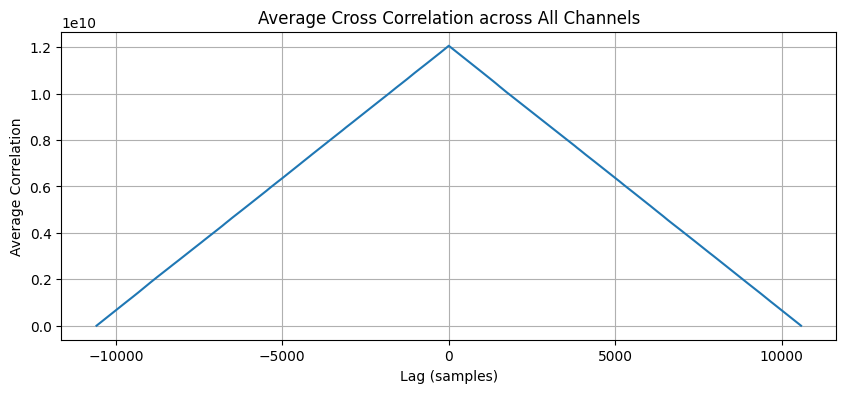

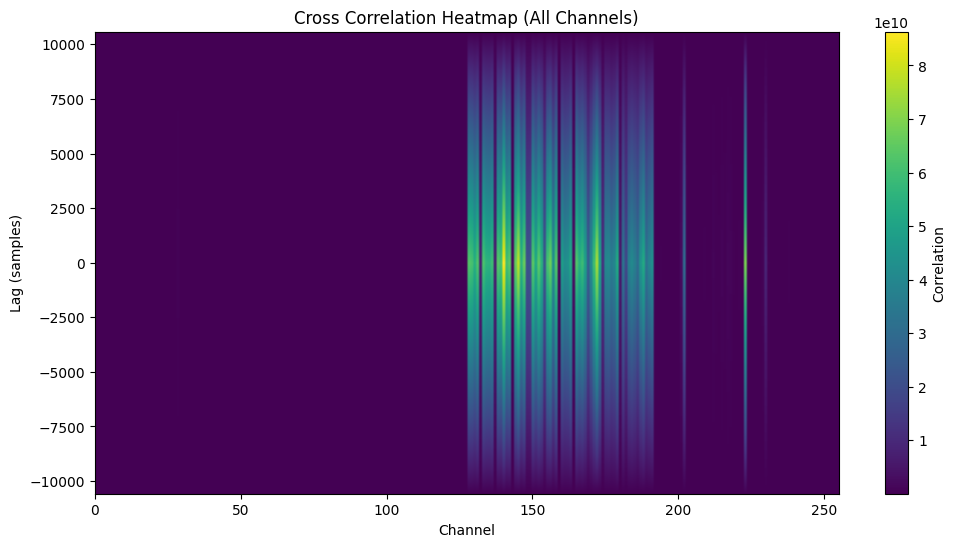

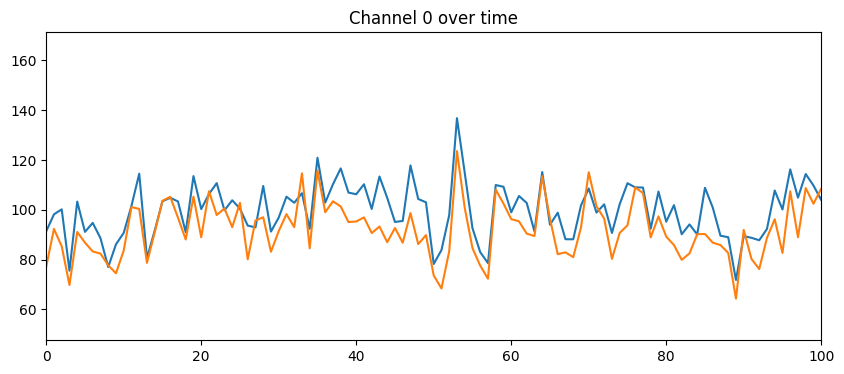

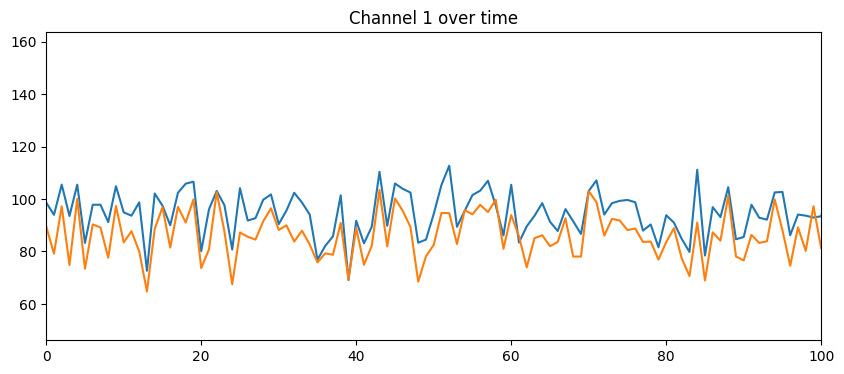

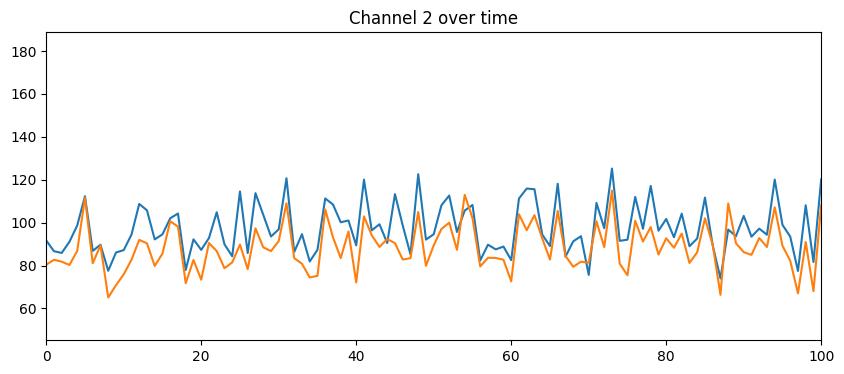

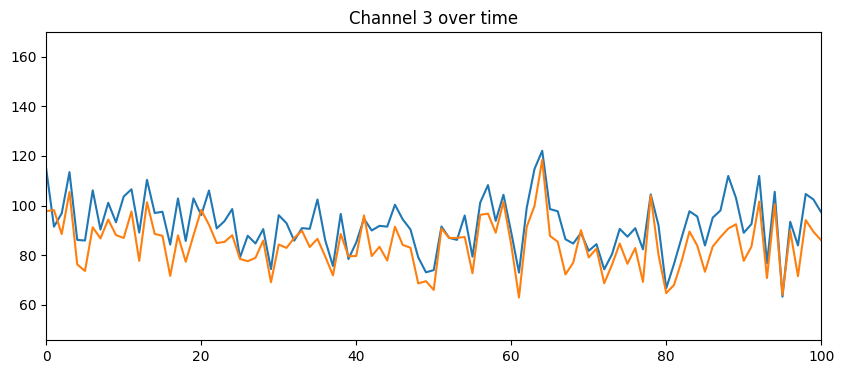

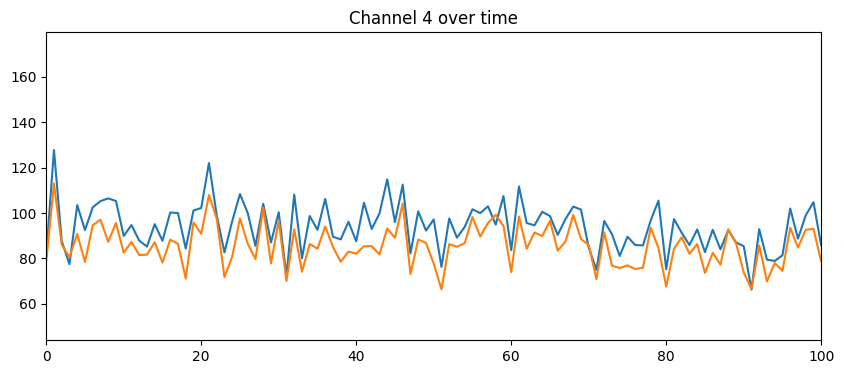

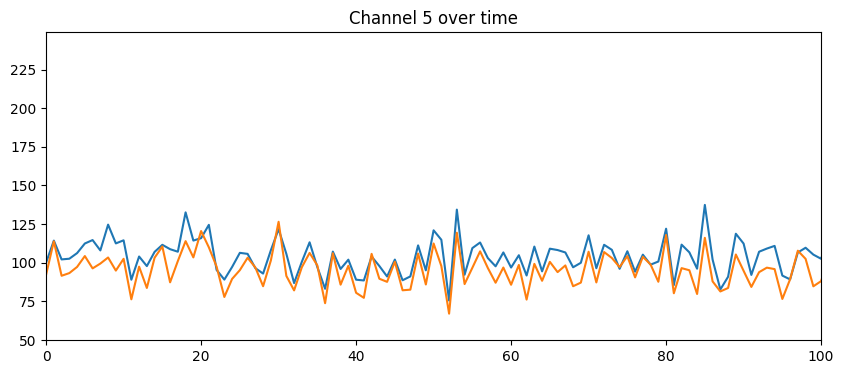

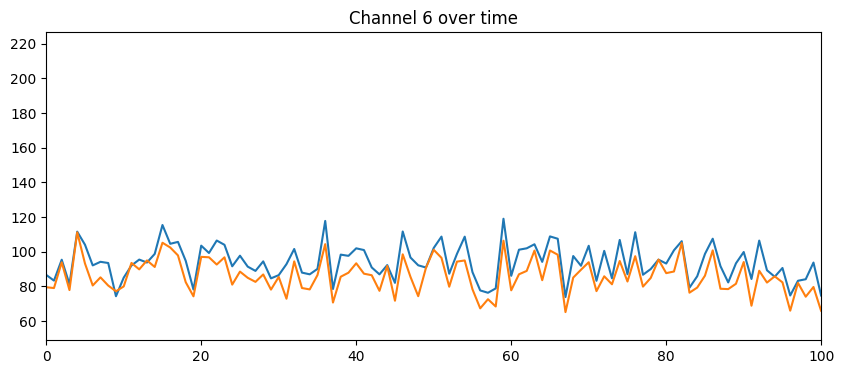

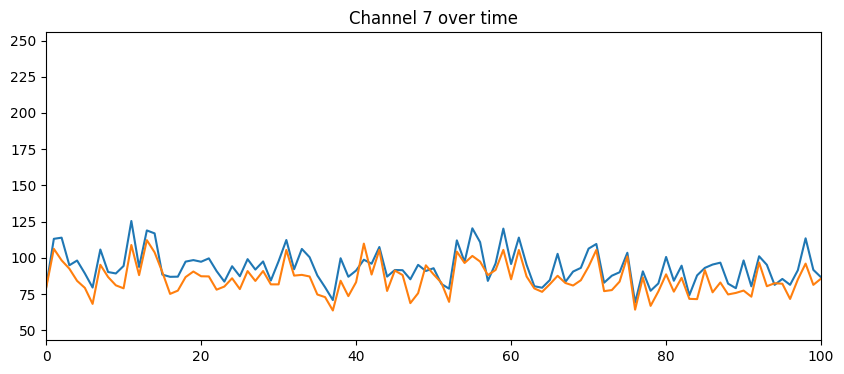

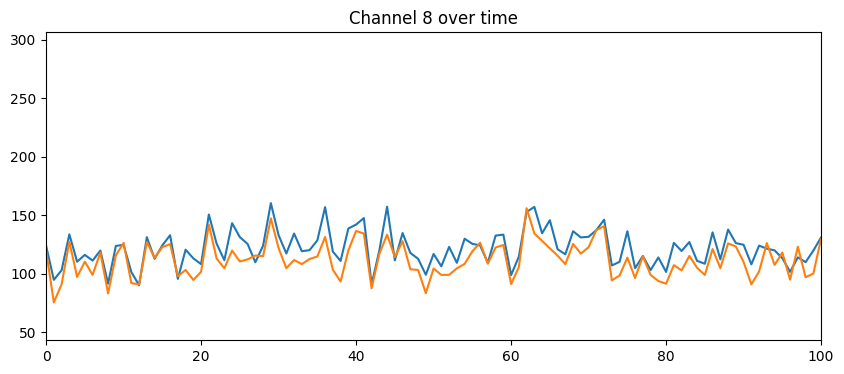

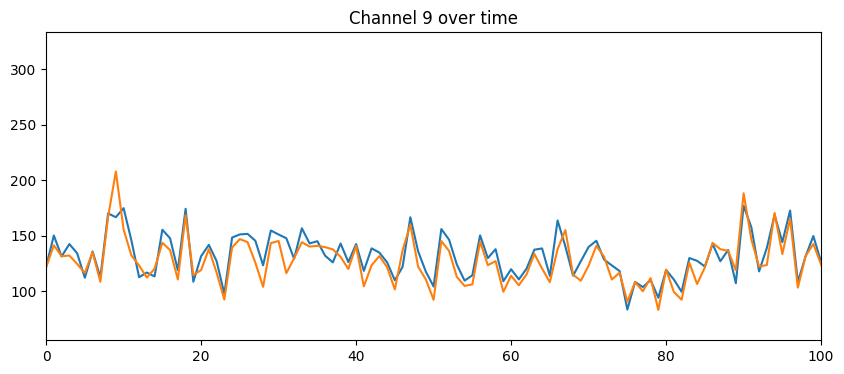

In [15]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import plotly.graph_objs as go


matlab_rep_data = scipy.io.loadmat("/Users/sabrasisler/Desktop/NPTL/Data/t12.2025.01.23/reprocessed_timestamp_aligned/20250123_101632_(17)_reprocessed.mat")
rep_dat = matlab_rep_data["spike_pow"]

redis_data = scipy.io.loadmat("/Users/sabrasisler/Desktop/NPTL/Data/t12.2025.01.23/RedisMat/20250123_101632_(17).mat")
redis_spike = redis_data["binned_neural_spike_band_power"]
print(redis_data.keys())
# Example data: replace these with your actual data arrays
signal1 = rep_dat
signal2 = redis_spike


# Calculate the length of the cross correlation
lag_length = signal1.shape[0] + signal2.shape[0] - 1

# Pre-allocate array to hold cross correlation results for each channel
cross_corr = np.zeros((lag_length, signal1.shape[1]))

# Compute cross correlation for each channel (column)
for ch in range(signal1.shape[1]):
    cross_corr[:, ch] = correlate(signal1[:, ch], signal2[:, ch], mode='full')

# Define the lag axis; note that for signals of different lengths:
# lags go from -(M-1) to (N-1), where N = len(signal1) and M = len(signal2)
lags = np.arange(-(signal2.shape[0]-1), signal1.shape[0])


# Alternatively, visualize the average cross correlation across all channels
avg_cross_corr = np.mean(cross_corr, axis=1)
plt.figure(figsize=(10, 4))
plt.plot(lags, avg_cross_corr)
plt.title('Average Cross Correlation across All Channels')
plt.xlabel('Lag (samples)')
plt.ylabel('Average Correlation')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.imshow(cross_corr, aspect='auto', cmap='viridis',
           extent=[0, signal1.shape[1]-1, -(signal2.shape[0]-1), signal1.shape[0]-1])
plt.colorbar(label='Correlation')
plt.title('Cross Correlation Heatmap (All Channels)')
plt.xlabel('Channel')
plt.ylabel('Lag (samples)')
plt.show()

for i in range (10):
    plt.figure(figsize=(10, 4))
    #plt.plot(signal1[:, i])
    plt.plot(signal2[:, i])
    plt.plot(signal1[:, i])
    plt.title(f"Channel {i} over time")
    plt.xlim(0,100)
    plt.show()


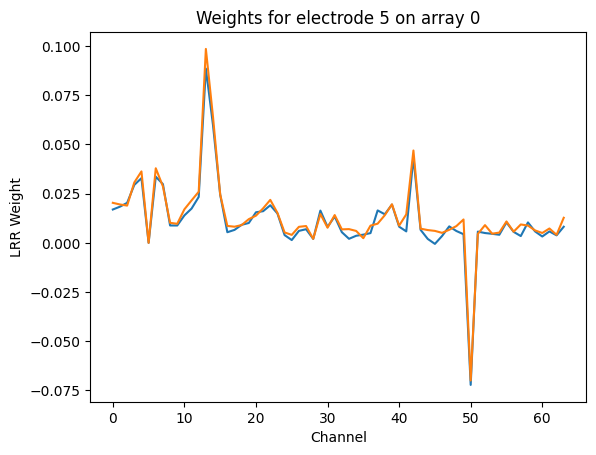

In [12]:
lrr_weights = scipy.io.loadmat("/Users/sabrasisler/Desktop/NPTL/Data/t12.2025.01.23/t12.2025.01.23_block(3)_lrr_weights.mat")["lrr_weights"]
updated_weights = matlab_rep_data["lrr_coeffs"]

array = 0
electrode = 5
plt.plot(lrr_weights[array][electrode])
plt.plot(updated_weights[array][electrode])
plt.title(f"Weights for electrode {electrode} on array {array}")
plt.xlabel("Channel")
plt.ylabel("LRR Weight")
plt.show()

In [5]:
import scipy.io

# Define the file name
redis_file_name = "/Users/sabrasisler/Desktop/NPTL/Data/t12.2025.01.23/RedisMat/20250123_101632_(17).mat"  # Replace with your actual file
reprocessed_filename = "/Users/sabrasisler/Desktop/NPTL/Data/t12.2025.01.23/reprocessed_timestamp_aligned/20250123_101632_(17)_reprocessed.mat"

# Load the .mat file
redis_data = scipy.io.loadmat(redis_file_name)
repro_data = scipy.io.loadmat(reprocessed_filename)

print(len(redis_data.keys()))
print(len(repro_data.keys()))

redis_data.update(repro_data)

# The cleaned data dictionary is now ready to use
#print("Keys in loaded MAT file:", redis_data.keys())  # Check remaining keys


print(len(redis_data.keys()))


64
79
79
